<font color='black' size="+2.5"><b>1 - Libraries</b></font><br><a id='1'></a>


In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn import metrics 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error



import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import skew



<a id="2"></a> <br>
<font color='black' size="+2.5"><b>2 - Reading Data</b></font><br>

In this section:
- 2.1 Reading Data
- 2.2 Understanding the Data
- 2.3 Checking for missing values

### 2.1 Reading Data

In [2]:
dataset = pd.read_csv('train.csv',index_col='Id')


### 2.2 Understanding the Data

In [3]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.shape

(1460, 80)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### 2.3 Checking for Missing Values

In [7]:
#missing values
missing = dataset.isnull().sum()
missing

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

<AxesSubplot:>

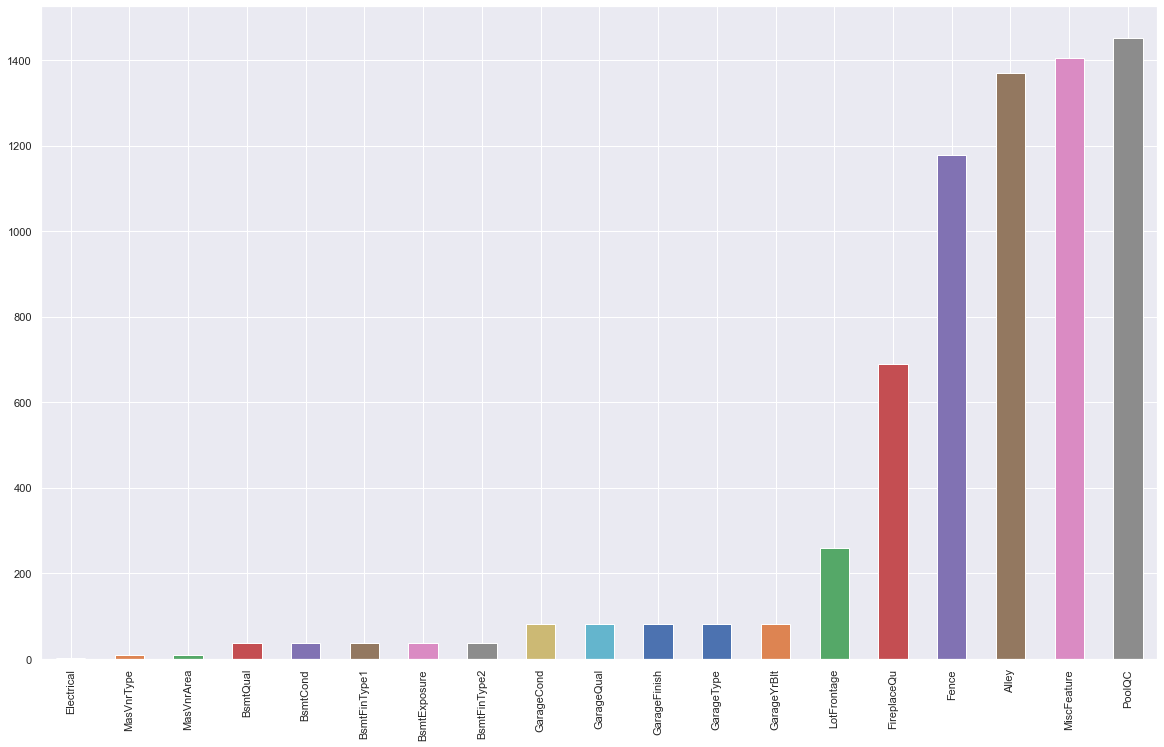

In [8]:
# Filter the missing data that have values more than 0
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(20,12))
missing.plot.bar()

<a id="3"></a> <br>
<font size="+2.5"><b>3 - Data Visualization</b></font><br>

In this section:

- 3.1 Viewing Columns

- 3.2 Distribution of Data

- 3.3 Univariate Analysis of Data

- 3.4 Bivariate Analysis of Data

### 3.1 Viewing numeric Features Columns using exclude method ....or we can make it using the prev method

In [9]:
numerical_features = dataset.select_dtypes(exclude=['object']).drop(['SalePrice'], axis=1).copy()
print(numerical_features.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


### 3.1 Viewing caregorical Features Columns using exclude method ....or we can make it using the prev method

In [10]:
categorical_features = dataset.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### 3.2 Distribution of Data

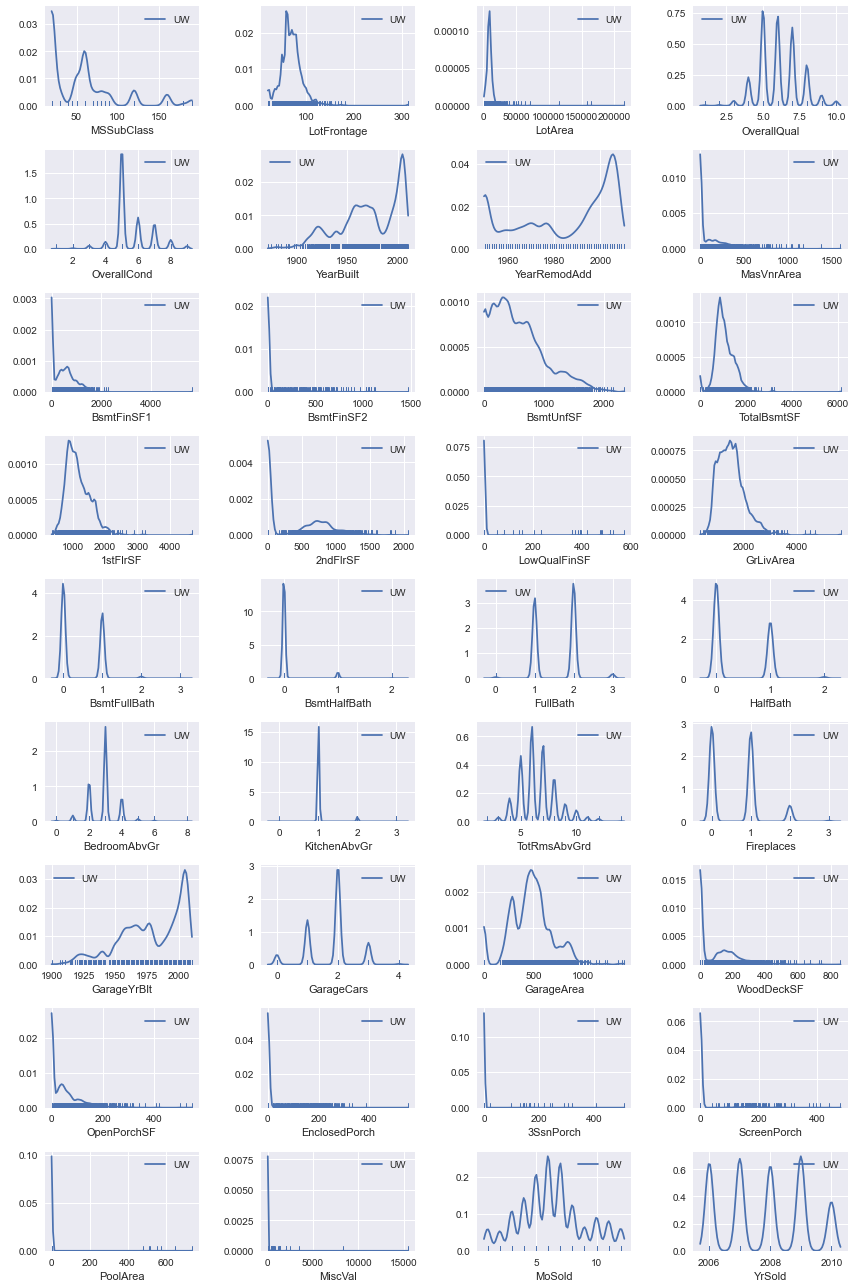

In [20]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

### 3.3 Univariate Analysis

![](box_plot.png) 

![](box_plot_V2.png) 

box_plot is a way to find the outlaiers using five terms :- 

1- Min

2- Max

3- median --> the middle value in the dataset

4- first quartile Q1 --> the middle number between the smallest (not the min) number and the median, note that smallest number is the lowest number within this range not always be the minmum number.

5- Third Quartile Q3 --> the middle number between the largest number (not the max) and the median, note that largest number is the largest number within this range not always be the max number.

PDF is used to find the probability of the random varaible falling within range values 


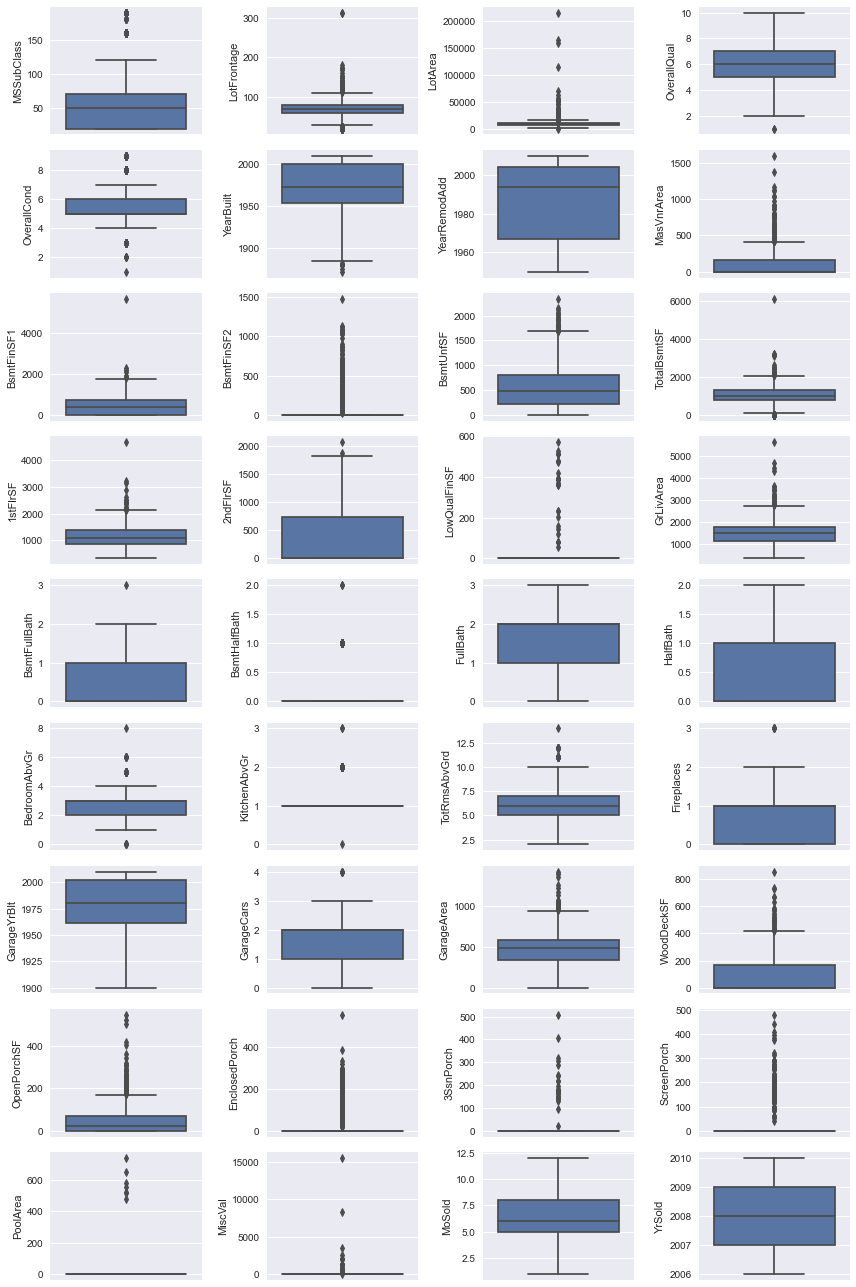

In [21]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

### 3.4 Bivariate Analysis

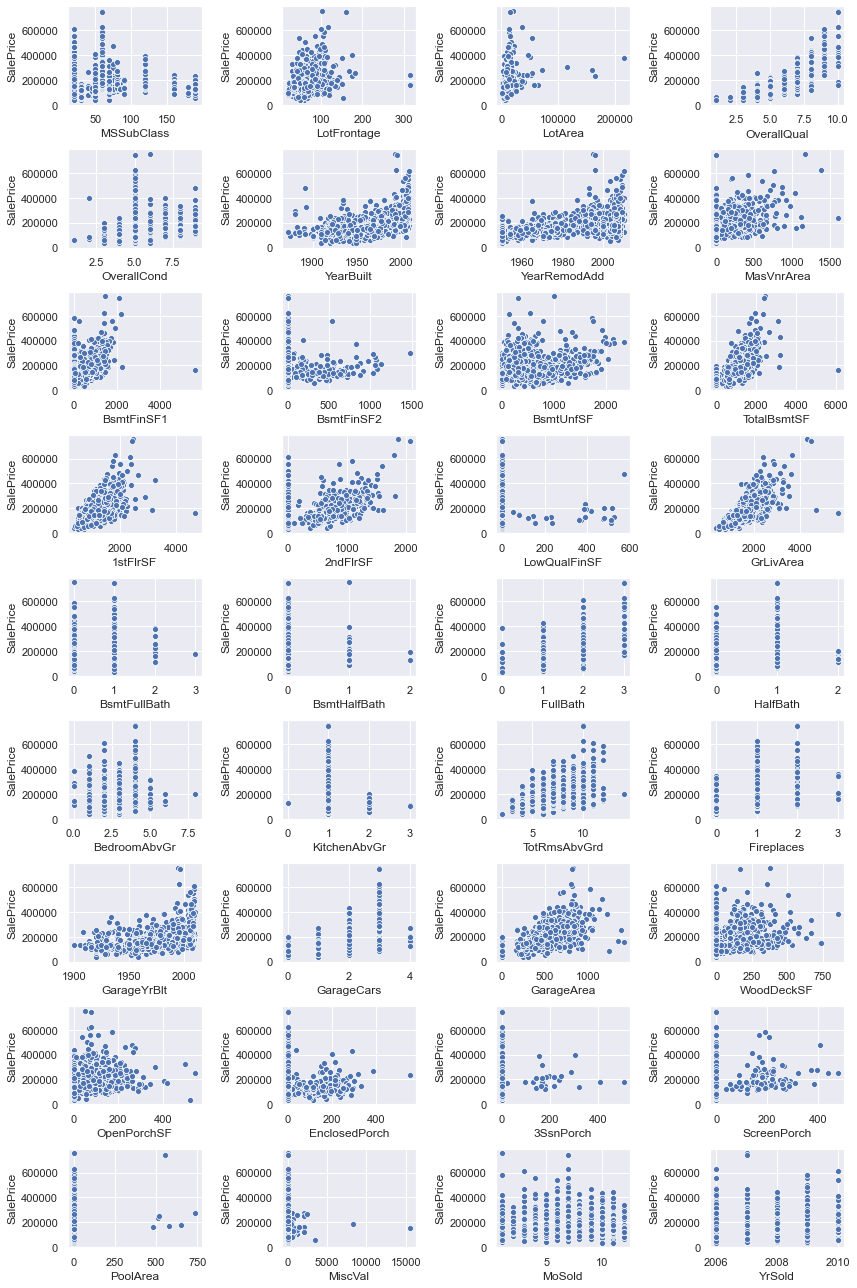

In [12]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],dataset['SalePrice'])
plt.tight_layout()
plt.show()

<a id="4"></a> <br>
<font color='black' size="+2.5"><b>4 - Data Processing</b></font><br>

In this section:
- 4.1 Outliers
- 4.2 Removing Certain Features
- 4.3 Filling Numerical Missing Values
- 4.4 Filling Categorical Missing Values
- 4.5 Filling Missing Values in 'LotFrontage'
- 4.6 Filling Missing Values in 'MSZoning'

### 4.1 Outliers

Notes on Outliers:
According to the plots above, these are the features which appear to have outliers:
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- TotalBsmtSF
- GrLivArea
- 1stFlrSF
- EnclosedPorch
- MiscVal
- LowQualFinSF

Let's take a closer look at these features...

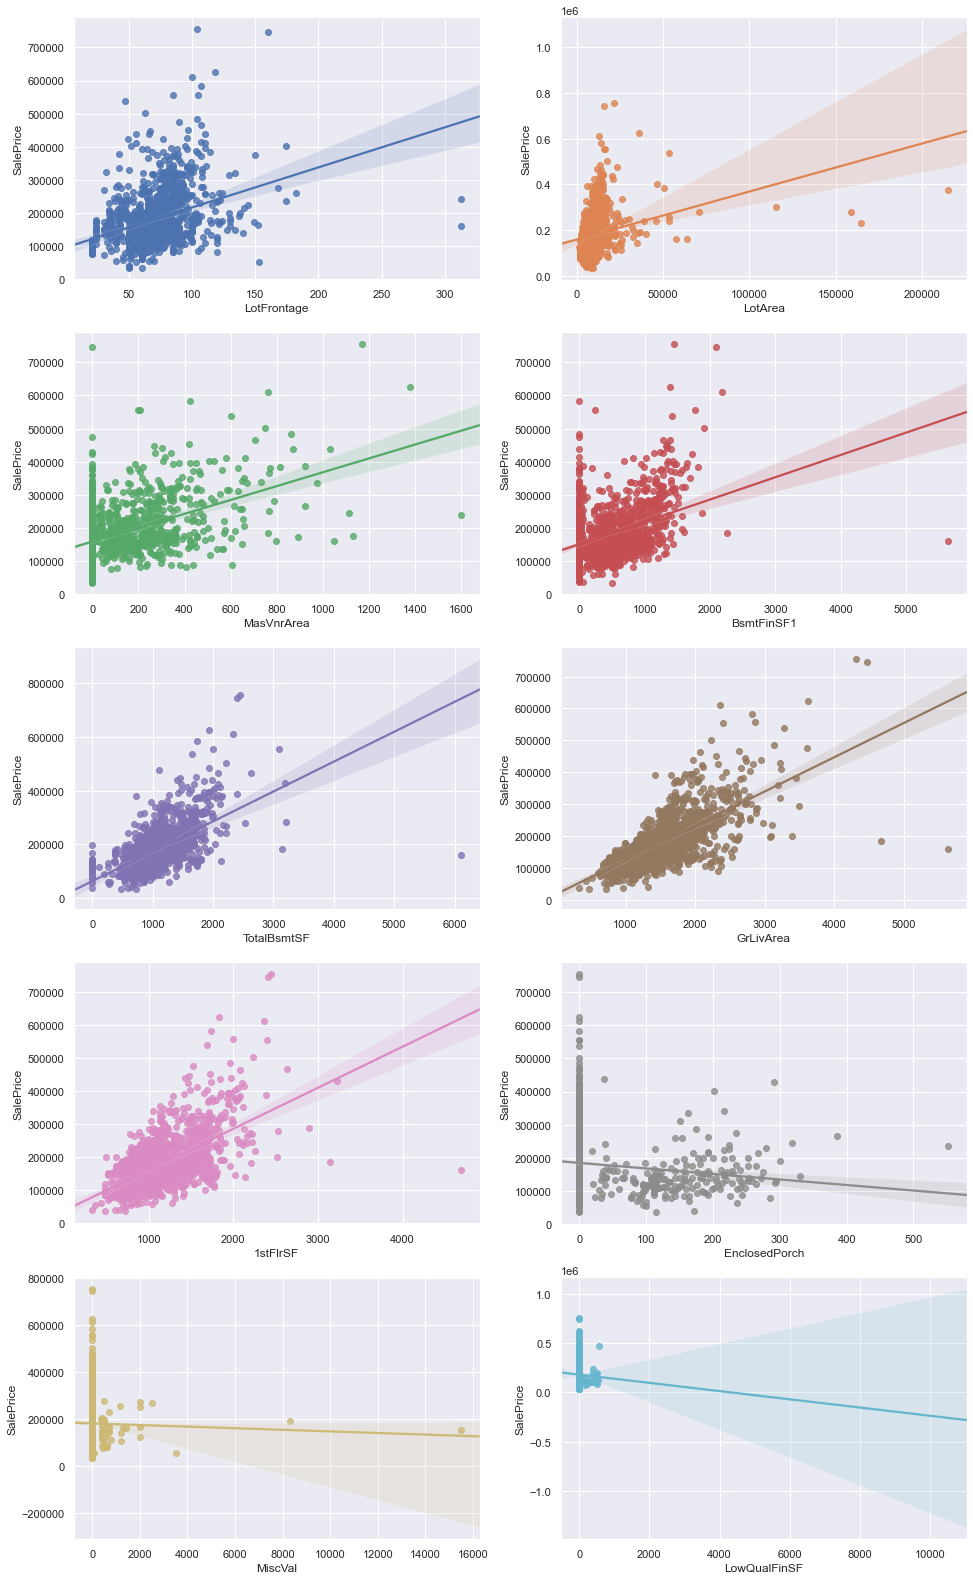

In [13]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(dataset['LotFrontage'], dataset['SalePrice'], ax=ax1)
_ = sns.regplot(dataset['LotArea'], dataset['SalePrice'], ax=ax2)
_ = sns.regplot(dataset['MasVnrArea'], dataset['SalePrice'], ax=ax3)
_ = sns.regplot(dataset['BsmtFinSF1'], dataset['SalePrice'], ax=ax4)
_ = sns.regplot(dataset['TotalBsmtSF'], dataset['SalePrice'], ax=ax5)
_ = sns.regplot(dataset['GrLivArea'], dataset['SalePrice'], ax=ax6)
_ = sns.regplot(dataset['1stFlrSF'], dataset['SalePrice'], ax=ax7)
_ = sns.regplot(dataset['EnclosedPorch'], dataset['SalePrice'], ax=ax8)
_ = sns.regplot(dataset['MiscVal'], dataset['SalePrice'], ax=ax9)
_ = sns.regplot(dataset['LowQualFinSF'], dataset['SalePrice'], ax=ax10)

In [14]:
dataset.shape

(1460, 80)

From these regplots we have confirmed there are outliers, so we decide to remove them.

In [15]:
dataset = dataset.drop(dataset[dataset['LotFrontage']>200].index)
dataset = dataset.drop(dataset[dataset['LotArea']>100000].index)
dataset = dataset.drop(dataset[dataset['MasVnrArea']>1200].index)
dataset = dataset.drop(dataset[dataset['BsmtFinSF1']>4000].index)
dataset = dataset.drop(dataset[dataset['TotalBsmtSF']>4000].index)
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000) ].index)
dataset = dataset.drop(dataset[dataset['1stFlrSF']>4000].index)
dataset = dataset.drop(dataset[dataset['EnclosedPorch']>500].index)
dataset = dataset.drop(dataset[dataset['MiscVal']>5000].index)
dataset = dataset.drop(dataset[(dataset['LowQualFinSF']>600) & (dataset['SalePrice']>400000)].index)

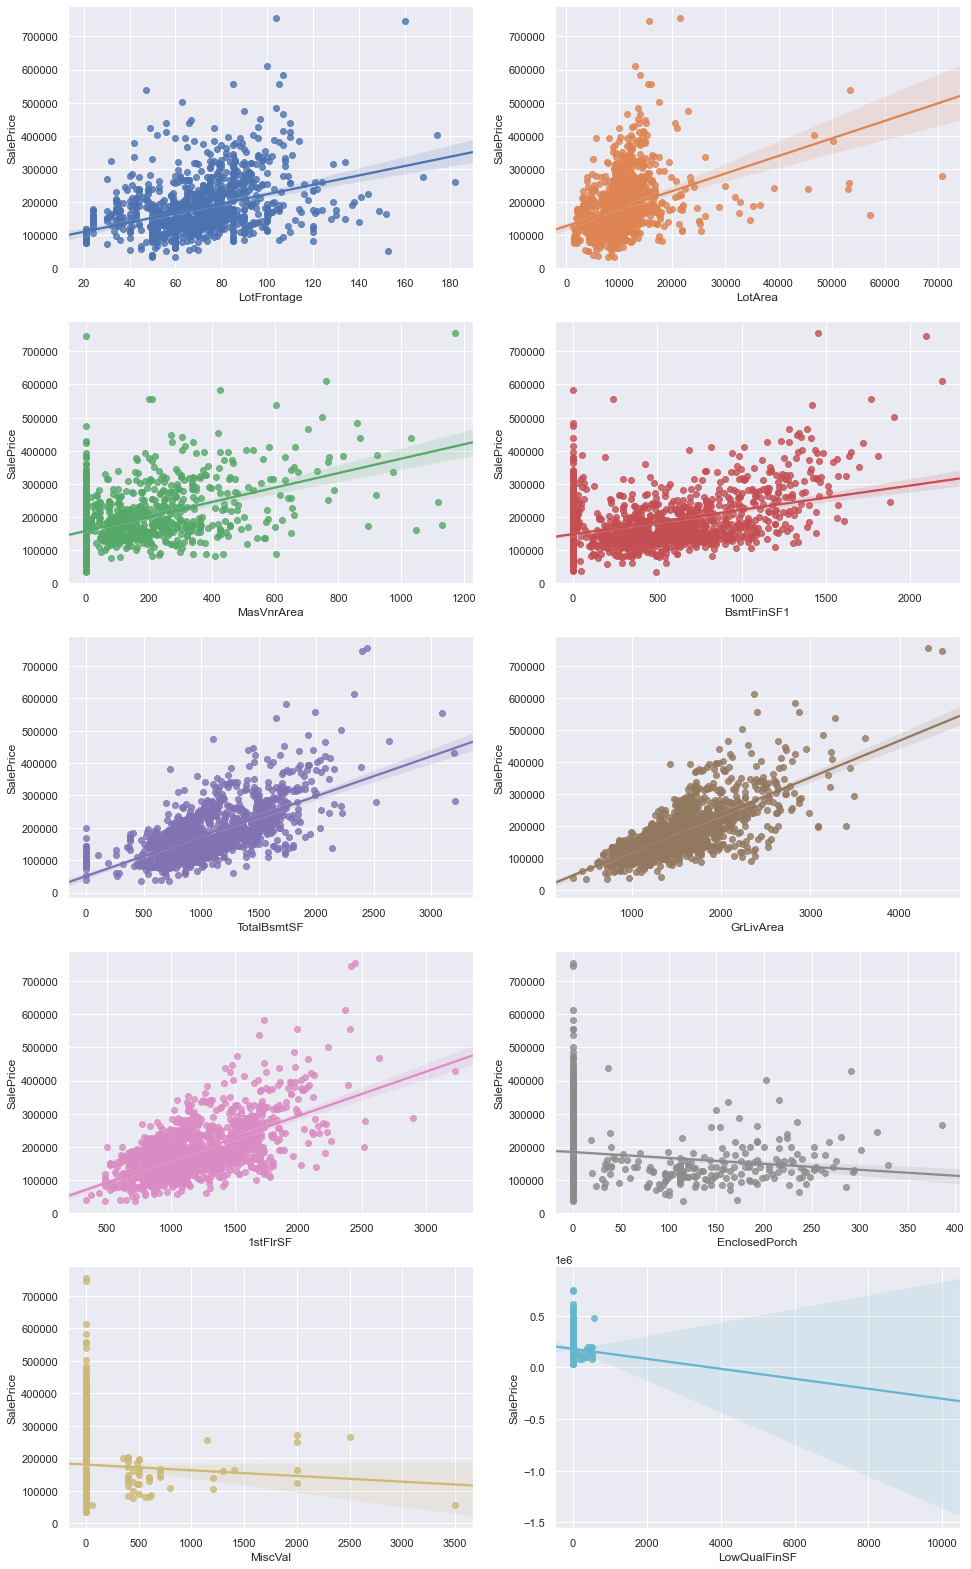

In [16]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(dataset['LotFrontage'], dataset['SalePrice'], ax=ax1)
_ = sns.regplot(dataset['LotArea'], dataset['SalePrice'], ax=ax2)
_ = sns.regplot(dataset['MasVnrArea'], dataset['SalePrice'], ax=ax3)
_ = sns.regplot(dataset['BsmtFinSF1'], dataset['SalePrice'], ax=ax4)
_ = sns.regplot(dataset['TotalBsmtSF'], dataset['SalePrice'], ax=ax5)
_ = sns.regplot(dataset['GrLivArea'], dataset['SalePrice'], ax=ax6)
_ = sns.regplot(dataset['1stFlrSF'], dataset['SalePrice'], ax=ax7)
_ = sns.regplot(dataset['EnclosedPorch'], dataset['SalePrice'], ax=ax8)
_ = sns.regplot(dataset['MiscVal'], dataset['SalePrice'], ax=ax9)
_ = sns.regplot(dataset['LowQualFinSF'], dataset['SalePrice'], ax=ax10)